In [1]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
import random

2023-01-01 12:30:18.974638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 12:30:18.974671: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

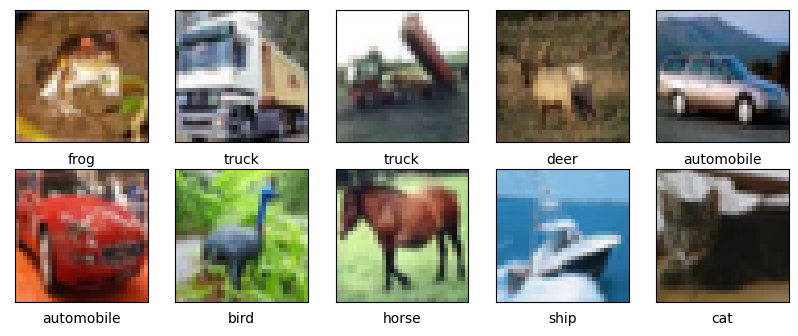

In [4]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (10):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [5]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [6]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

2023-01-01 12:30:49.955233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-01 12:30:49.955275: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-01 12:30:49.955299: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hosna-X555LD): /proc/driver/nvidia/version does not exist
2023-01-01 12:30:49.970361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
def plot_loss_acc(history):   
    """ plot loss and accuary per epoch """
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [8]:
def evaluate_on_test(model):    
    """ Evaluating the MLP with test """
    
    score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
    print(f"{model.metrics_names[0]}: {score[0]}")
    print(f"{model.metrics_names[1]}: {score[1]}")

In [9]:
def plot_confusion_matrix(model):
    """ plot confusin matrix from test data """
    
    actual = np.argmax(y_test, axis=1)
    predicted = np.argmax(model.predict(X_test), axis=1)

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

    cm_display.plot()
    plt.show()

In [10]:
def train_validation_split(df_x, df_y, validation_size):
    """ 
    Splits the dataset(df) to train and test with the number/pertentage of test dataset. 
    """
    
    if isinstance(validation_size, float):                              
        validation_size = round(validation_size * len(df_x))

    indices = df_x.index.tolist()                                        
    validation_indices = random.sample(population=indices, k=validation_size)      

    validation_df_x = df_x.loc[validation_indices]                                     
    validation_df_y = df_y.loc[validation_indices]                                     
    
    train_df_x = df_x.drop(validation_indices)                                   
    train_df_y = df_y.drop(validation_indices)                                   
    
    return train_df_x, train_df_y, validation_df_x, validation_df_y

In [11]:
random.seed(0)     
X_train, y_train, X_Validation, y_Validation = train_validation_split(
    pd.DataFrame(X_train), pd.DataFrame(y_train), validation_size=0.2)

-----------------

# a)

Epoch 1/10


2023-01-01 12:30:51.421791: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 9s 6ms/step - loss: 1.8297 - accuracy: 0.3366 - val_loss: 1.7198 - val_accuracy: 0.3808
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6590 - accuracy: 0.4063 - val_loss: 1.6269 - val_accuracy: 0.4244
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5897 - accuracy: 0.4324 - val_loss: 1.5962 - val_accuracy: 0.4374
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5434 - accuracy: 0.4468 - val_loss: 1.5654 - val_accuracy: 0.4409
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5140 - accuracy: 0.4570 - val_loss: 1.5398 - val_accuracy: 0.4498
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4820 - accuracy: 0.4683 - val_loss: 1.5328 - val_accuracy: 0.4603
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4585 - accuracy: 0.4754 - val_loss: 1.5367 - val_accuracy: 0.4581
Epo

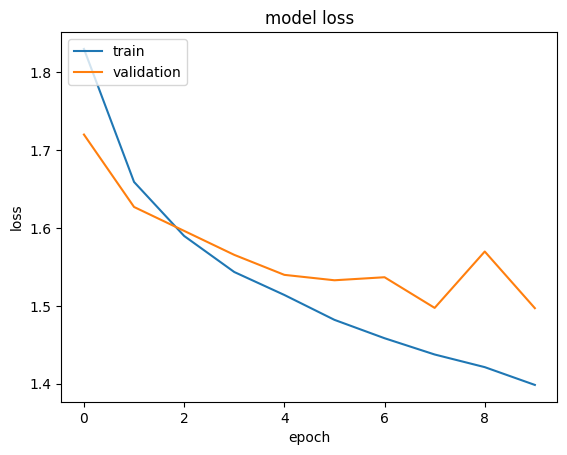

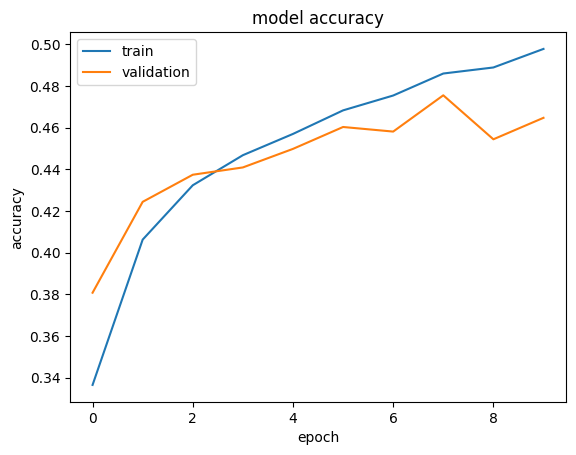

loss: 1.4781264066696167
accuracy: 0.4740000069141388
313/313 [==============================] - 1s 2ms/step


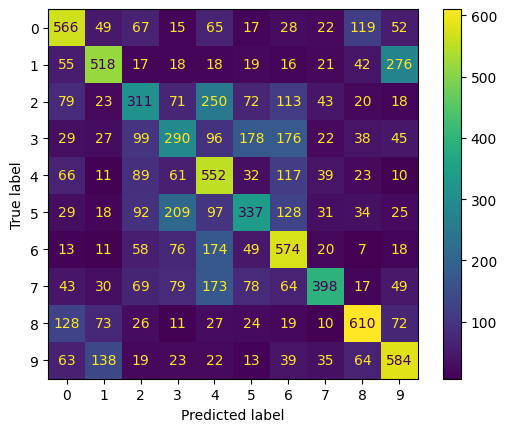

In [12]:
# batch_size = 32
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

Epoch 1/10


2023-01-01 12:32:13.376088: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


625/625 [==============================] - 5s 8ms/step - loss: 1.8169 - accuracy: 0.3439 - val_loss: 1.6867 - val_accuracy: 0.3953
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 1.6366 - accuracy: 0.4131 - val_loss: 1.6539 - val_accuracy: 0.4108
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 1.5574 - accuracy: 0.4415 - val_loss: 1.5612 - val_accuracy: 0.4473
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4958 - accuracy: 0.4654 - val_loss: 1.5257 - val_accuracy: 0.4581
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 1.4550 - accuracy: 0.4792 - val_loss: 1.4782 - val_accuracy: 0.4776
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 1.4196 - accuracy: 0.4941 - val_loss: 1.4875 - val_accuracy: 0.4768
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 1.3863 - accuracy: 0.5041 - val_loss: 1.4787 - val_accuracy: 0.4746
Epoch 8/10
625/62

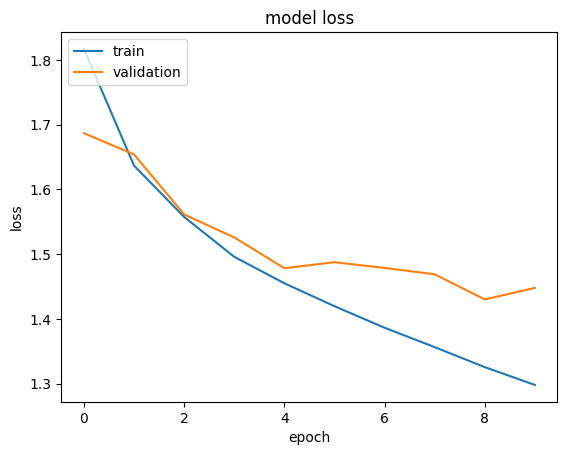

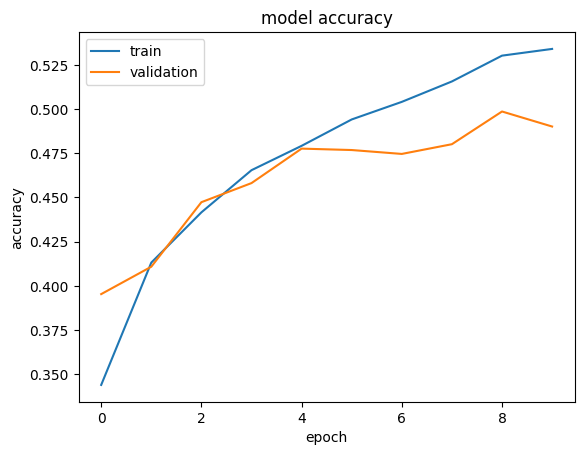

loss: 1.414817214012146
accuracy: 0.4927000105381012
313/313 [==============================] - 1s 2ms/step


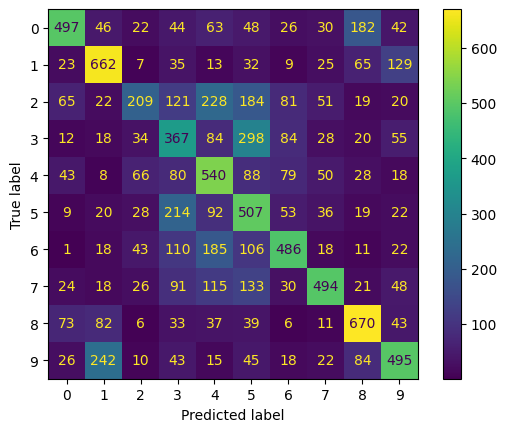

In [13]:
# batch_size = 64
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

Epoch 1/10


2023-01-01 12:33:01.595728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


157/157 [==============================] - 3s 16ms/step - loss: 1.8855 - accuracy: 0.3275 - val_loss: 1.8169 - val_accuracy: 0.3452
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 1.6807 - accuracy: 0.4062 - val_loss: 1.6982 - val_accuracy: 0.3971
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 1.6028 - accuracy: 0.4348 - val_loss: 1.6726 - val_accuracy: 0.4136
Epoch 4/10
157/157 [==============================] - 2s 15ms/step - loss: 1.5410 - accuracy: 0.4566 - val_loss: 1.6633 - val_accuracy: 0.4138
Epoch 5/10
157/157 [==============================] - 2s 15ms/step - loss: 1.4940 - accuracy: 0.4739 - val_loss: 1.5621 - val_accuracy: 0.4478
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4485 - accuracy: 0.4884 - val_loss: 1.5056 - val_accuracy: 0.4759
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4131 - accuracy: 0.5009 - val_loss: 1.5034 - val_accuracy: 0.4752
Epoch 8/10

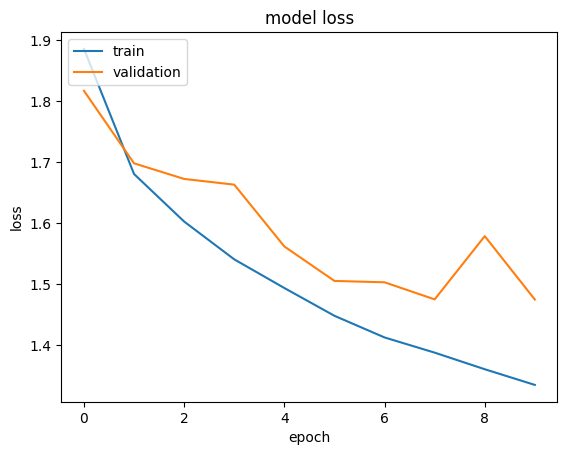

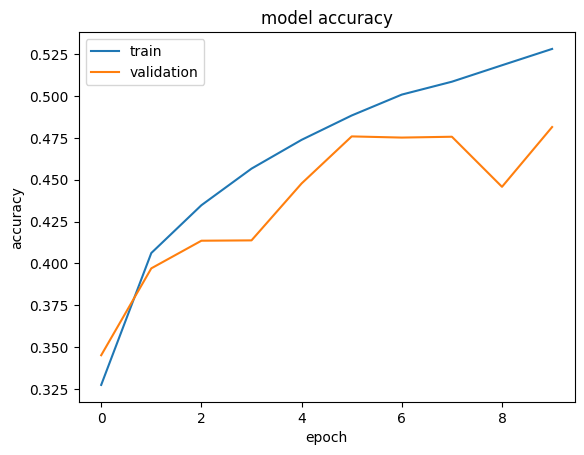

loss: 1.4698994159698486
accuracy: 0.4814999997615814
313/313 [==============================] - 1s 2ms/step


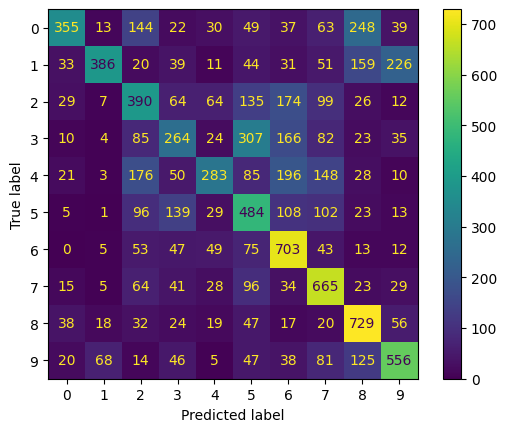

In [14]:
# batch_size = 256

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=256, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

with increasing batch size learning time decreases.
with increasing batch size loss decreses and then increase again.
with increasing batch size accuarcy increase and then decreses again.

### 64 was the best

---------------

# b)

Epoch 1/10


2023-01-01 12:33:29.699058: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


625/625 [==============================] - 5s 8ms/step - loss: 1.9046 - accuracy: 0.3104 - val_loss: 1.7881 - val_accuracy: 0.3635
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 1.6892 - accuracy: 0.3994 - val_loss: 1.6352 - val_accuracy: 0.4200
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5912 - accuracy: 0.4338 - val_loss: 1.5944 - val_accuracy: 0.4306
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5253 - accuracy: 0.4552 - val_loss: 1.5464 - val_accuracy: 0.4538
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4799 - accuracy: 0.4742 - val_loss: 1.5128 - val_accuracy: 0.4692
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4409 - accuracy: 0.4876 - val_loss: 1.4565 - val_accuracy: 0.4847
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4047 - accuracy: 0.4985 - val_loss: 1.4500 - val_accuracy: 0.4852
Epoch 8/10
625/62

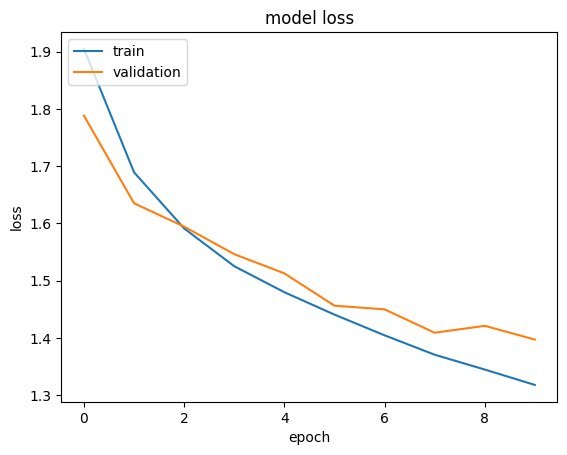

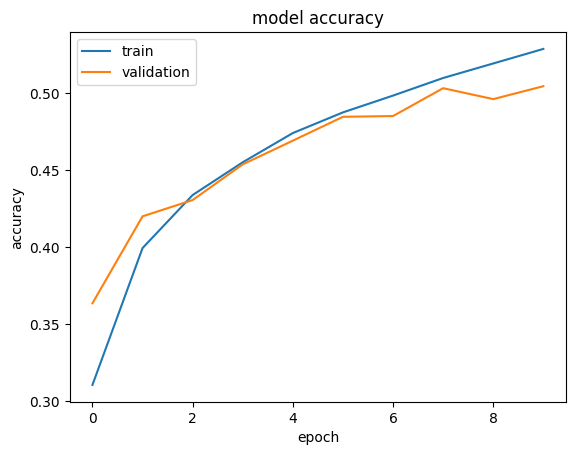

loss: 1.3855684995651245
accuracy: 0.508400022983551
313/313 [==============================] - 1s 2ms/step


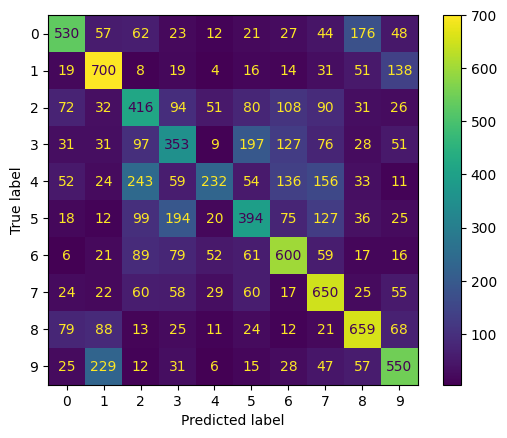

In [15]:
# relu + sigmoid + softmax
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

Epoch 1/10


2023-01-01 12:34:18.682431: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


625/625 [==============================] - 5s 7ms/step - loss: 1.9049 - accuracy: 0.3200 - val_loss: 1.8142 - val_accuracy: 0.3557
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 1.7185 - accuracy: 0.3918 - val_loss: 1.7259 - val_accuracy: 0.3887
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 1.6228 - accuracy: 0.4224 - val_loss: 1.6084 - val_accuracy: 0.4326
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5588 - accuracy: 0.4457 - val_loss: 1.5556 - val_accuracy: 0.4487
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5107 - accuracy: 0.4617 - val_loss: 1.5226 - val_accuracy: 0.4614
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4688 - accuracy: 0.4763 - val_loss: 1.5112 - val_accuracy: 0.4616
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4353 - accuracy: 0.4869 - val_loss: 1.4947 - val_accuracy: 0.4704
Epoch 8/10
625/62

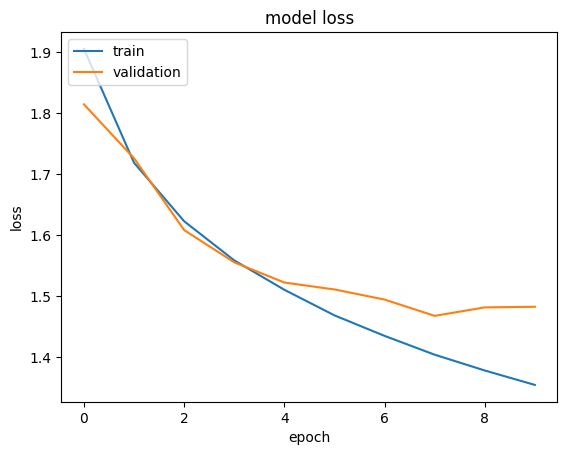

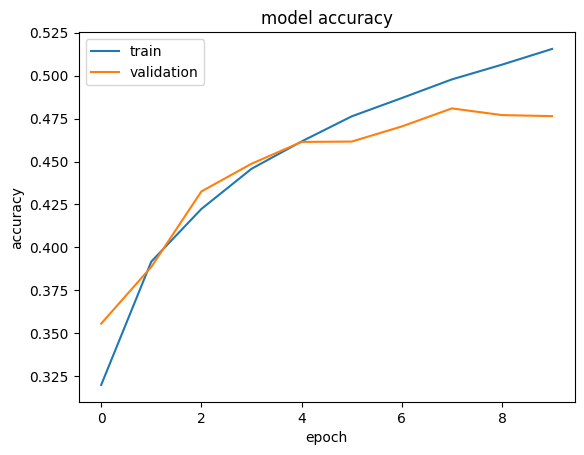

loss: 1.4674909114837646
accuracy: 0.4796999990940094
313/313 [==============================] - 1s 3ms/step


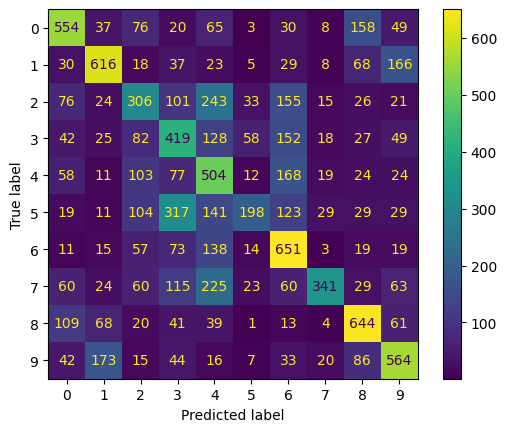

In [16]:
# tanh + sigmoid + softmax

model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 1.7938 - accuracy: 0.3550 - val_loss: 1.6541 - val_accuracy: 0.4127
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 1.6089 - accuracy: 0.4252 - val_loss: 1.5826 - val_accuracy: 0.4406
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 1.5302 - accuracy: 0.4519 - val_loss: 1.5245 - val_accuracy: 0.4601
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 1.4744 - accuracy: 0.4712 - val_loss: 1.5338 - val_accuracy: 0.4517
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 1.4370 - accuracy: 0.4852 - val_loss: 1.4980 - val_accuracy: 0.4651
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 1.4007 - accuracy: 0.4983 - val_loss: 1.4566 - val_accuracy: 0.4883
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 1.3723 - accuracy: 0.5071 - val_loss: 1.4436 - val_accuracy: 0.4902
Epoch 

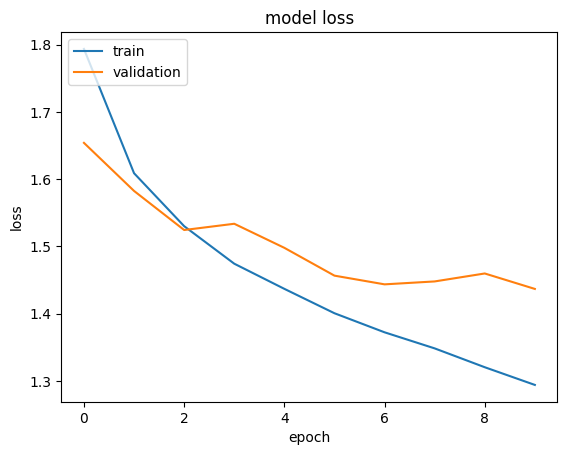

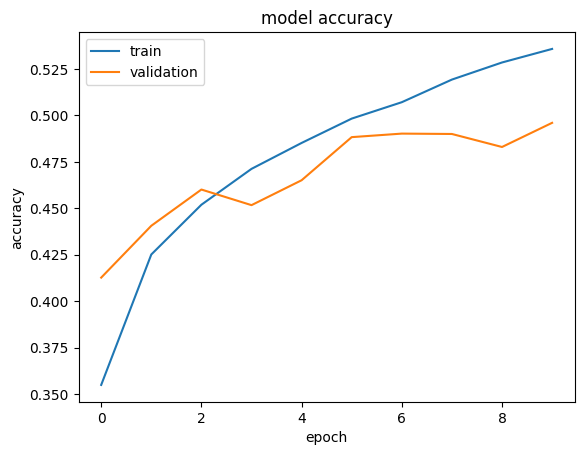

loss: 1.4181959629058838
accuracy: 0.49540001153945923
313/313 [==============================] - 1s 3ms/step


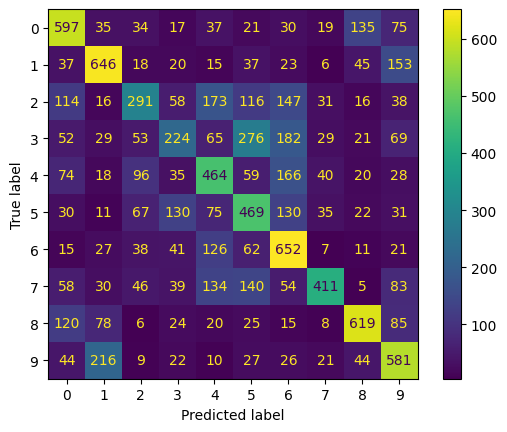

In [17]:
# tanh + relu + softmax

model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

results from best to worst:
1. relu + sigmoid
2. relu + tanh
3. relu + relu
4. tanh + sigmoid

## Comparission of activation functions:
1. Sigmoid:
    - Advantage:
        - Gives you a smooth gradient while converging.
        - One of the best Normalised functions.
        - Gives a clear prediction(classification) with 1 & 0.
    - Disadvantage:
        - Prone to Vanishing Gradient problem.
        - Not a zero-centric function(Always gives a positive values).
        - Computationally expensive function(exponential in nature).
2. Tanh:
    - Advantage:
        - Here negative values are also considered whereas in the sigmoid minimum range is 0 but in Tanh, the minimum range is -1. This is why the Tanh activation function is also known as the zero centered activation function.
        - Zero-centric function unlike Sigmoid.
        - It is a smooth gradient converging function.

    - Disadvantage:
        - Also facing the same issue of Vanishing Gradient Problem like a sigmoid function.
        - Prone to Vanishing Gradient function.
        - Computationally expensive function(exponential in nature).

3. Relu:
    - Advantagee:
        - Here all the negative values are converted into the 0 so there are no negative values are available.
        - Maximum Threshold values are Infinity, so there is no issue of Vanishing Gradient problem so the output prediction accuracy and there efficiency is maximum.
        - Speed is fast compare to other activation function
        - Can deal with Vanishing Gradient problem.
        - Computationally inexpensive function(linear in nature).
    - Disadvantage:
        - Not a zero-centric function.
        - Gives zero value as inactive in the negative axis.

------------

# C)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 0.0892 - accuracy: 0.1825 - val_loss: 0.0881 - val_accuracy: 0.2266
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0873 - accuracy: 0.2429 - val_loss: 0.0866 - val_accuracy: 0.2541
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0858 - accuracy: 0.2641 - val_loss: 0.0851 - val_accuracy: 0.2759
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0845 - accuracy: 0.2814 - val_loss: 0.0838 - val_accuracy: 0.2938
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.0833 - accuracy: 0.2962 - val_loss: 0.0827 - val_accuracy: 0.2961
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0822 - accuracy: 0.3065 - val_loss: 0.0818 - val_accuracy: 0.3130
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0813 - accuracy: 0.3183 - val_loss: 0.0811 - val_accuracy: 0.3218
Epoch

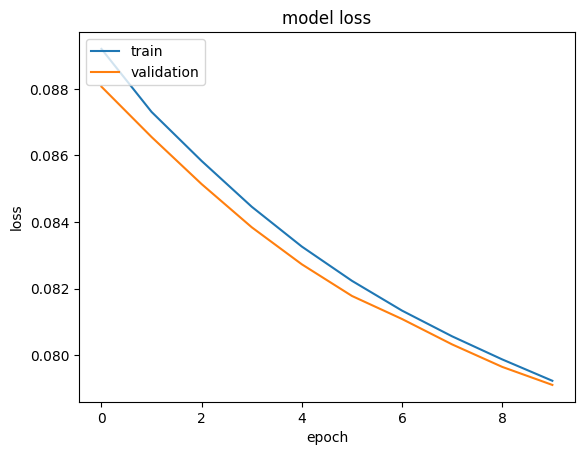

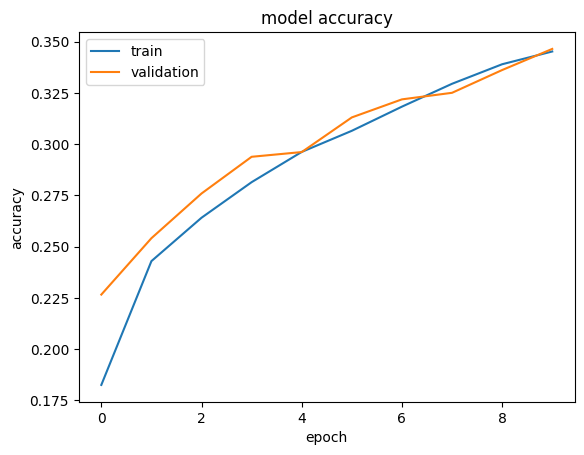

loss: 0.07893133908510208
accuracy: 0.34769999980926514
313/313 [==============================] - 1s 3ms/step


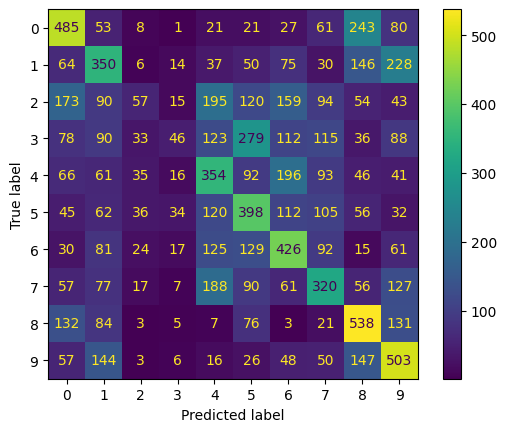

In [19]:
# mse
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='mse',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 1.9024 - accuracy: 0.3173 - val_loss: 1.7740 - val_accuracy: 0.3726
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 1.6886 - accuracy: 0.3969 - val_loss: 1.6297 - val_accuracy: 0.4218
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 1.5912 - accuracy: 0.4343 - val_loss: 1.5663 - val_accuracy: 0.4485
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 1.5298 - accuracy: 0.4538 - val_loss: 1.5644 - val_accuracy: 0.4450
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 1.4856 - accuracy: 0.4702 - val_loss: 1.5188 - val_accuracy: 0.4522
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 1.4426 - accuracy: 0.4861 - val_loss: 1.4608 - val_accuracy: 0.4836
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 1.4101 - accuracy: 0.4968 - val_loss: 1.5021 - val_accuracy: 0.4642
Epoch 

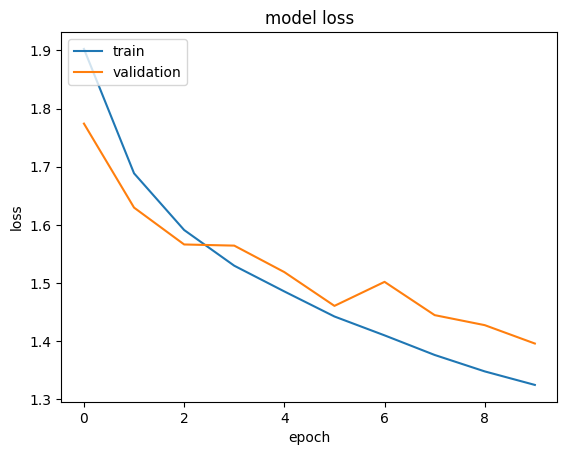

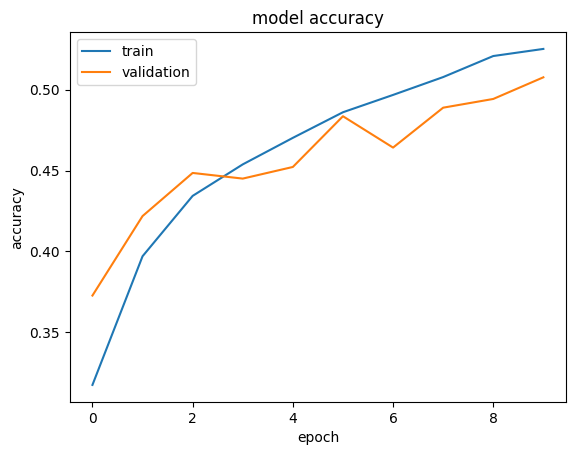

loss: 1.3916760683059692
accuracy: 0.5051000118255615
313/313 [==============================] - 1s 4ms/step


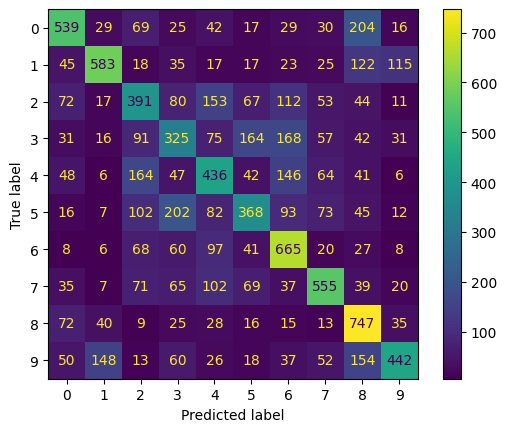

In [20]:
# categorical_crossentropy
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=10, batch_size=64, verbose=1, validation_data = (X_Validation, y_Validation))
plot_loss_acc(history)
evaluate_on_test(model)
plot_confusion_matrix(model)

### categorical_crossentropy is better than mse because out problem is a classification problem.
Cross-entropy loss, or log loss, measure the performance of a classification model whose output is a probability value between 0 and 1. It is preferred for classification, while mean squared error (MSE) is one of the best choices for regression. This comes directly from the statement of problems itself. In classification we work with a very particular set of possible output values thus MSE is badly defined.

In classification MSE is not possible because the task is not convex, continuous or differentiable.

---